# Python Guide To Maximum Likelihood Estimation
Data is everywhere. The present human lifestyle relies heavily on data. Machine learning is a huge domain that strives hard continuously to make great things out of the largely available data. With data in hand, a machine learning algorithm tries to find the pattern or the distribution of that data. Machine learning algorithms are usually defined and derived in a pattern-specific or a distribution-specific manner. For instance, Logistic Regression is a traditional machine learning algorithm meant specifically for a binary classification problem. Linear Regression is a traditional machine learning algorithm meant for the data that is linearly distributed in a multi-dimensional space. One specific algorithm cannot be applied for a problem of different nature.

To this end, Maximum Likelihood Estimation, simply known as MLE, is a traditional probabilistic approach that can be applied to data belonging to any distribution, i.e., Normal, Poisson, Bernoulli, etc. With prior assumption or knowledge about the data distribution, Maximum Likelihood Estimation helps find the most likely-to-occur distribution parameters. For instance, let us say we have data that is assumed to be normally distributed, but we do not know its mean and standard deviation parameters. Maximum Likelihood Estimation iteratively searches the most likely mean and standard deviation that could have generated the distribution. Moreover, Maximum Likelihood Estimation can be applied to both regression and classification problems. 

Therefore, Maximum Likelihood Estimation is simply an optimization algorithm that searches for the most suitable parameters. Since we know the data distribution a priori, the algorithm attempts iteratively to find its pattern. The approach is much generalized, so that it is important to devise a user-defined Python function that solves the particular machine learning problem. 

## How does Maximum Likelihood Estimation work?
The term likelihood can be defined as the possibility that the parameters under consideration may generate the data. A likelihood function is simply the joint probability function of the data distribution. A maximum likelihood function is the optimized likelihood function employed with most-likely parameters. Function maximization is performed by differentiating the likelihood function with respect to the distribution parameters and set individually to zero.

If we look back into the basics of probability, we can understand that the joint probability function is simply the product of the probability functions of individual data points. With a large dataset, it is practically difficult to formulate a joint probability function and differentiate it with respect to the parameters. Hence MLE introduces logarithmic likelihood functions. Maximizing a strictly increasing function is the same as maximizing its logarithmic form. The parameters obtained via either likelihood function or log-likelihood function are the same. The logarithmic form enables the large product function to be converted into a summation function. It is quite easy to sum the individual likelihood functions and differentiate it. Because of this simplicity in math works, Maximum Likelihood Estimation solves huge datasets with data points in the order of millions!

For each problem, the users are required to formulate the model and distribution function to arrive at the log-likelihood function. The optimization is performed using the SciPy library’s ‘optimize’ module. The module has a method called ‘minimize’ that can minimize any input function with respect to an input parameter. In our case, the MLE looks for maximizing the log-likelihood function. Therefore, we supply the negative log likelihood as the input function to the ‘minimize’ method. It differentiates the user-defined negative log-likelihood function with respect to each input parameter and arrives at the optimal parameters iteratively. The parameters that are found through the MLE approach are called maximum likelihood estimates.

In the sequel, we discuss the Python implementation of Maximum Likelihood Estimation with an example. 

## Regression on Normally Distributed Data
Here, we perform simple linear regression on synthetic data. The data is ensured to be normally distributed by incorporating some random Gaussian noises. Data can be said to be normally distributed if its residual follows the normal distribution—Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 

Generate some synthetic data based on the assumption of Normal Distribution

In [2]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head() 

,x,y
0,-10.000000,-22.465093
1,-9.595960,-15.753985
2,-9.191919,-20.696625
3,-8.787879,-20.917298
4,-8.383838,-16.741646


Visualize the synthetic data on Seaborn’s regression plot.

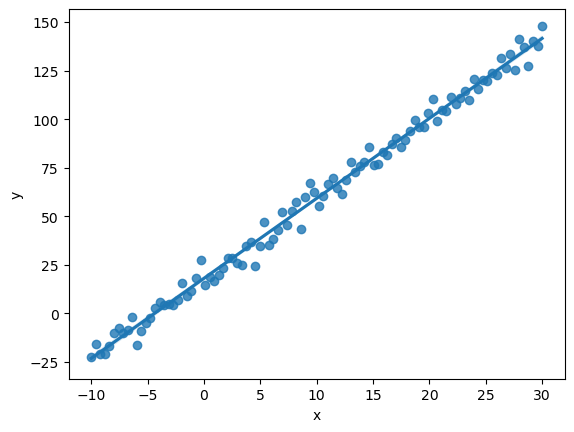

In [3]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

The data is normally distributed, and the output variable is a continuously varying number. Hence, we can use the Ordinary Least Squares (OLS) method to determine the model parameters and use them as a benchmark to evaluate the Maximum Likelihood Estimation approach. Apply the OLS algorithm to the synthetic data and find the model parameters.

In [4]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          3.26e-103
Time:                        12:39:06   Log-Likelihood:                -291.25
No. Observations:                 100   AIC:                             586.5
Df Residuals:                      98   BIC:                             591.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0556      0.593     30.471      0.000      16.880      19.231
x              4.1175      0.039    106.756      0.000       4.041       4.194
==============================================================================
Omnibus:                        0.108   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.000
Skew:                          -0.001   Prob(JB):                         1.00
Kurtosis:                       3.004   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get the intercept and regression coefficient values of the simple linear regression model. Further, we can derive the standard deviation of the normal distribution with the following codes.

In [5]:
res = model.resid
standard_dev = np.std(res)
standard_dev 


4.453118687574892

As we have solved the simple linear regression problem with an OLS model, it is time to solve the same problem by formulating it with Maximum Likelihood Estimation.

Define a user-defined Python function that can be iteratively called to determine the negative log-likelihood value. The key idea of formulating this function is that it must contain two elements: the first is the model building equation (here, the simple linear regression). The second is the logarithmic value of the probability density function (here, the log PDF of normal distribution). Since we need negative log-likelihood, it is obtained just by negating the log-likelihood.

In [6]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
    # extract parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

Minimize the negative log-likelihood of the generated data using the minimize method available with SciPy’s optimize module.

In [7]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

      fun: 291.2543212619946
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-6.25277556e-05, -2.54090084e-03,  5.11590773e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 224
      nit: 36
     njev: 56
   status: 0
  success: True
        x: array([18.05562131,  4.11745663,  4.453124  ])

The MLE approach arrives at the final optimal solution after 35 iterations. The model’s parameters, the intercept, the regression coefficient and the standard deviation are well matching to those obtained using the OLS approach. 

Here comes the big question. If the OLS approach provides the same results without any tedious function formulation, why do we go for the MLE approach? The answer is that the OLS approach is completely problem-specific and data-oriented. It can not be used for a different kind of problem or a different data distribution. On the other hand, the MLE approach is a general template for any kind of problem. With expertise in Maximum Likelihood Estimation, users can formulate and solve their own machine learning problems with raw data in hand.